In [41]:
# Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [42]:
data = pd.read_csv('../data/model-cleaned-players22.csv')

In [43]:
# Create a copy of this dataset. The new copy will be standardized
# so we can compare the performance of both the standardized and non-standardized datasets
standardized_data = data.copy()
standardized_data['value_eur'] = np.log(standardized_data['value_eur'])

y = data['value_eur']
x = data['international_reputation']

sdz_y = standardized_data['value_eur']
sdz_x = standardized_data['international_reputation']

In [44]:
x_trai, x_tes, y_trai, y_tes = train_test_split(
   x, y, test_size=0.2, random_state=0
)

x_train = np.reshape(x_trai.values, (-1, 1))
x_test = np.reshape(x_tes.values, (-1, 1))
y_train = np.reshape(y_trai.values, (-1, 1))
y_test = np.reshape(y_tes.values, (-1, 1))

In [45]:
# Standardize the train data
sd_x_train, sd_x_test, sd_y_train, sd_y_test = train_test_split(
   sdz_x, sdz_y, test_size=0.2, random_state=0
)


sd_x_train = np.reshape(sd_x_train.values, (-1, 1))
sd_x_test = np.reshape(sd_x_test.values, (-1, 1))
sdz_y_train = np.reshape(sd_y_train.values, (-1, 1))
sdz_y_test = np.reshape(sd_y_test.values, (-1, 1))

scaler = StandardScaler()
sdz_x_train = scaler.fit_transform(sd_x_train)
sdz_x_test = scaler.transform(sd_x_test)

In [46]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [47]:
sdz_lr = LinearRegression()
sdz_lr.fit(sdz_x_train, sdz_y_train)

LinearRegression()

In [48]:
y_pred_test = lr.predict(x_test)
y_pred_test

array([[1704202.1692205],
       [1704202.1692205],
       [1704202.1692205],
       ...,
       [1704202.1692205],
       [1704202.1692205],
       [1704202.1692205]])

In [49]:
sdz_y_pred_test = sdz_lr.predict(sdz_x_test)
sdz_y_pred_test

array([[13.81528697],
       [13.81528697],
       [13.81528697],
       ...,
       [13.81528697],
       [13.81528697],
       [13.81528697]])

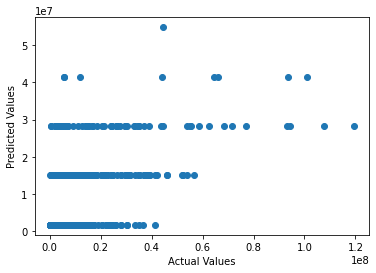

In [50]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

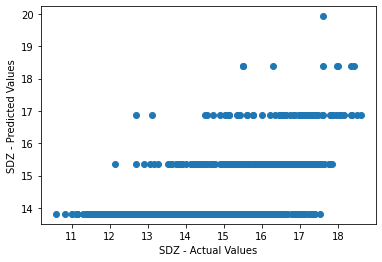

In [51]:
plt.scatter(sdz_y_test, sdz_y_pred_test)
plt.xlabel('SDZ - Actual Values')
plt.ylabel('SDZ - Predicted Values')
plt.show()

In [52]:
r2_score(y_test, y_pred_test)

0.41821172324818157

In [53]:
r2_score(sdz_y_test, sdz_y_pred_test)

0.24000190982739833

In [54]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

rmse

5824081.3131426005

In [55]:
# Calculate the Mean Squared Error (MSE)
sdz_mse = mean_squared_error(sdz_y_test, sdz_y_pred_test)

# Calculate the Root Mean Squared Error (RMSE)
sdz_rmse = np.sqrt(sdz_mse)

sdz_rmse

1.044435301600126

In [56]:
cross_val_score_train = cross_val_score(lr, x_train, y_train, scoring='r2', cv=10)

print(np.mean(cross_val_score_train))

0.3952130828924574


In [57]:
sdz_cross_val_score_train = cross_val_score(sdz_lr, sdz_x_train, sdz_y_train, scoring='r2', cv=10)

print(np.mean(sdz_cross_val_score_train))

0.2227942211647303
